# Midterm Exam (part 2) - Computational Physics I

### Date: Friday 18 October 2024
### Credits: 10 points

### Duration: 1 hour 15 minutes

## Name: Vincent Noguera

### Instructions:

- When you finish, please send me the **.ipynb** file via email to wbanda@yachaytech.edu.ec


- The exam is individual. Please include your name in the notebook.


- Within a **single python notebook**, solve the following problems:

## 5. Image processing: identifying sunspots (10 points) 

The purpose of this problem is to isolate and image a sunspot, and then calculate its size.

Sunspots are **dark spots on the Sun's surface that are cooler than the surrounding (brighter) areas due to intense magnetic activity**. They often appear in groups and are indicators of high Solar activity (called Solar maxima, which refer to the periods of peak solar activity during the Sun's 11-year solar cycle). We are currently within a Solar maxima period, which is expected to peak in July 2025. During such periods, sunspots, solar flares, and other solar phenomena are frequent.

### SDO sunspot data: 

The Solar Dynamics Observatory (SDO), launched by NASA in 2010, continuously monitors the Sun, capturing high-resolution images of its atmosphere. Its Atmospheric Imaging Assembly (AIA) provides data in multiple wavelengths, allowing us to study Solar dynamics and sunspot formation. Today's Sun images can be found here: https://suntoday.lmsal.com/suntoday/?suntoday_date=2024-10-18).

Please download the SDO data from: https://github.com/wbandabarragan/physics-teaching-data/tree/main/2D-data/f1700.fits

This file has an image of the Sun at a wavelength of $1700\,\rm Å$, which observes the lower photosphere (i.e. the visible surface of the Sun). It shows the cooler layers of the Sun at temperatures of $5000-6000\,\rm K$). It also highlights bright regions associated with magnetic activity and sunspots, so it is ideal for this exercise.

### Tasks:

(a) Open the FITS file and inspect its content and structure. You should see a header and the data.

(b) Create an I/O python function that reads in the filename and returns the header and the data as objects in a tuple.

(c) Call your I/O function, store the header and data objects, and make a high-quality figure showing the image of the Sun with a colour bar in linear scale. For optimal sunspot visualisation, you will need to fix the limits of the colour bar and choose an adequate colour palette. How many sunspots can you visually spot?

(d) Now you need to isolate a single sunspot. Select one target sunspot and use indexing to zoom into it. Make a high-quality figure showing the subset (zoomed-in) image of the Sun, containing your target sunspot.

(e) Make a 1D histogram of pixel intensity within the subset (zoomed-in) image. Do the sunspots have low or high intensities?

(f) Create a python function that isolates the area covered by the sunspot. Your function should read the subset image and return a cleaned binary image array with ones in the sunspot and zeroes outside.

(g) Call your function and make a high-quality figure showing the binary image of the sunspot with an appropriate colour bar.

(h) Using your binary image, calculate the total area in pixel units covered by the sunspot, and estimate the sunspot radius also in pixel units assuming that its area is circular, i.e. $A_{\rm sunspot}=\pi\,r_{\rm sunspot}^2$.

(i) Now you need to calculate the sunspot radius in physical units ($\rm km$). To do this, you first need to read from the FITS file the header information on the angular size of a pixel in the image (called "CDELT1" in units of $\rm arcsec$). Use the header object returned in (c) and isolate the value of "CDELT1" from it. Then, convert it to a physical size (in $\rm km$) using the Earth-Sun distance of $1.496\times 10^8\,\rm km$ and trigonometry.

(j) Use the calculated value of "CDELT1" (in $\rm km$) to estimate the sunspot radius in $\rm km$. Based on your results, are sunspots larger or smaller than the Earth? For reference, the Earth radius is $6.37\times 10^3\,\rm km$.

In [1]:
#import libraries:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
!ls

f1700.fits  midterm-exam-p2-Copy1.ipynb  midterm-exam-p2.ipynb


### First aproach:


In [3]:
gal1 =  fits.open("f1700.fits")
print(type(gal1))

<class 'astropy.io.fits.hdu.hdulist.HDUList'>


In [4]:
#Look at the header

hed_gal1 = gal1[0].header
print(hed_gal1)

keys_gal1 = gal1[0].header.keys
data_gal1 = gal1[0].data
# print(data_gal1)
# print(keys_gal1)

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                   16 / number of bits per data pixel                  NAXIS   =                    0 / number of data axes                            EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [5]:
#Look at the header

hed_gal1 = gal1[1].header
# print(hed_gal1)

keys_gal1 = gal1[1].header.keys
data_gal1 = gal1[1].data
# print(data_gal1)
# print(keys_gal1)

### Def IO Function:

In [6]:
def IOfun(filename):
    """
    Input:
        filename-> name of the file once its opened
    Arg:
        asign to each variable what data is collected from the file, from the position 1 where contains the information
    Output:
        hed_filename-> Header of the file
        data_filename-> Data of the file
    """
    #Look at the header
    hed_filename = filename[1].header
    
    #Look at the keys
    keys_filename = filename[1].header.keys
    #Look at the data
    data_filename = filename[1].data


    return hed_filename, data_filename

In [7]:
#Asign the file name which is going to be opened
filename = fits.open("f1700.fits")
#Use of the IO function to get the header and the data
hed, data = IOfun(filename)

In [8]:
#Check the type and the shape of the data
print(type(data), data.shape)


<class 'numpy.ndarray'> (4096, 4096)


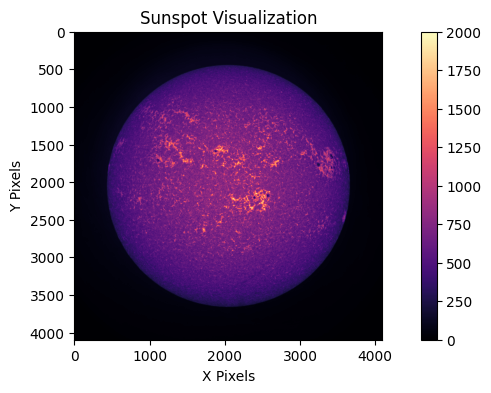

In [9]:
#Plot the figure
plt.figure(figsize=(10,4))
#Define the figure with the limits to appreciate
plt.imshow(data, cmap="magma", clim=(0,2000) )
plt.title('Sunspot Visualization')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.colorbar()

#### First approximation to get the correct values for the subset:

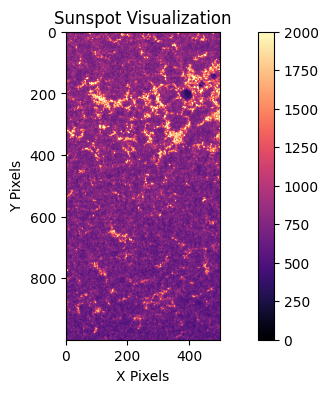

In [10]:
#Apreciate where is the sunspot
#define a interest region:

sunspot=data[2000:3000,2000:2500]
plt.figure(figsize=(10,4))

plt.imshow(sunspot, cmap="magma", clim=(0,2000) )
plt.title('Sunspot Visualization')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.colorbar()

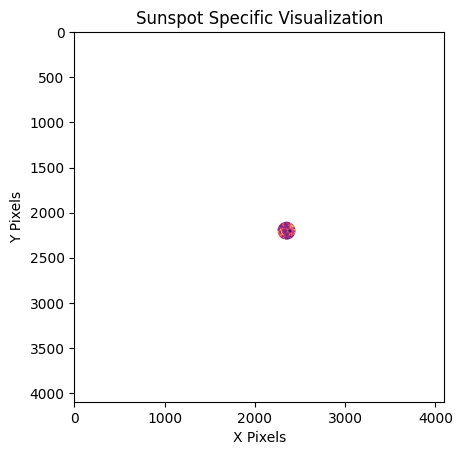

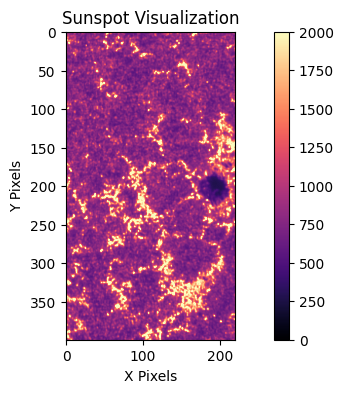

In [11]:
#Show comparison between the point that is gotten and the 
fig, ax = plt.subplots()

im = ax.imshow(data,cmap="magma", clim=(0,2000))
plt.title('Sunspot Specific Visualization')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')

patch = patches.Circle((2350, 2200), radius=100, transform=ax.transData) #I can use the patch to decide where will be the star...(200,100)

im.set_clip_path(patch)

plt.show()
#define a interest region:
x_pix=(2000,3000)
y_pix=(2000,2500)
sunspot=data[2000:2400,2200:2420]
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
plt.imshow(sunspot, cmap="magma", clim=(0,2000) )
plt.title('Sunspot Visualization')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.colorbar()

### Subset:

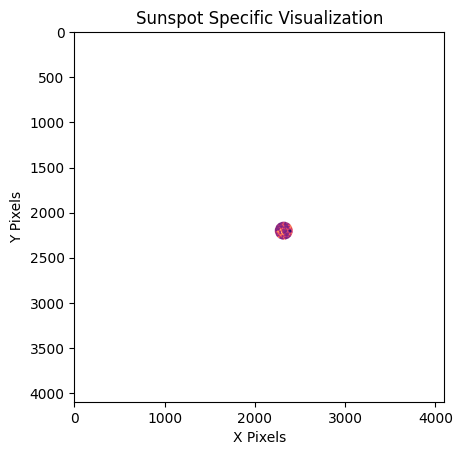

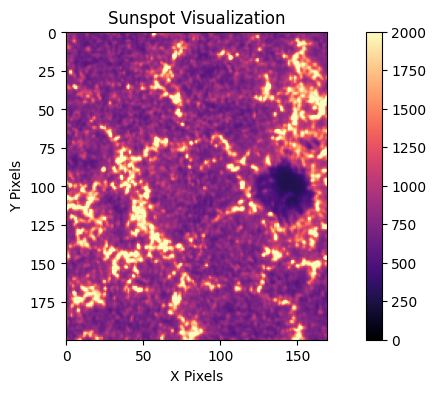

In [12]:
#Show comparison between the point that is gotten and the point which is going to be analized
fig, ax = plt.subplots()

im = ax.imshow(data,cmap="magma", clim=(0,2000))
plt.title('Sunspot Specific Visualization')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')

patch = patches.Circle((2320, 2200), radius=100, transform=ax.transData) #I can use the patch to decide where will be the star...(200,100)

im.set_clip_path(patch)

plt.show()
#define a interest region:
x_pix=(2000,3000)
y_pix=(2000,2500)
sunspot=data[2100:2300,2250:2420]
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
plt.imshow(sunspot, cmap="magma", clim=(0,2000) )
plt.title('Sunspot Visualization')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.colorbar()

In [13]:
# Flatten the 2D image
sunspot_zoomed=sunspot
sunspot_zoomed_1d = sunspot_zoomed.reshape((sunspot_zoomed.size),1)
#Show the original and the actual shape of the subset
print(sunspot_zoomed.shape, sunspot_zoomed_1d.shape)


(200, 170) (34000, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

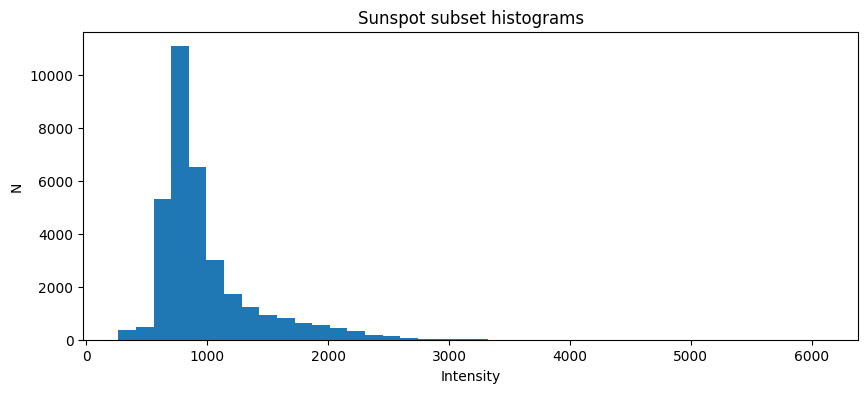

In [14]:
plt.figure(figsize=(10,4))


plt.hist(sunspot_zoomed_1d, bins=40)
plt.title('Sunspot subset histograms')
plt.xlabel('Intensity')
plt.ylabel('N')
plt.show


The sunspots have low intensities.

#### Extra process just for appreciate and make after that the function:

In [15]:
#See min/max

print("For first image subset zoomed sunsport, min is: ",np.min(sunspot_zoomed_1d)," max is:", np.max(sunspot_zoomed_1d))


For first image subset zoomed sunsport, min is:  265  max is: 6093


<function matplotlib.pyplot.show(close=None, block=None)>

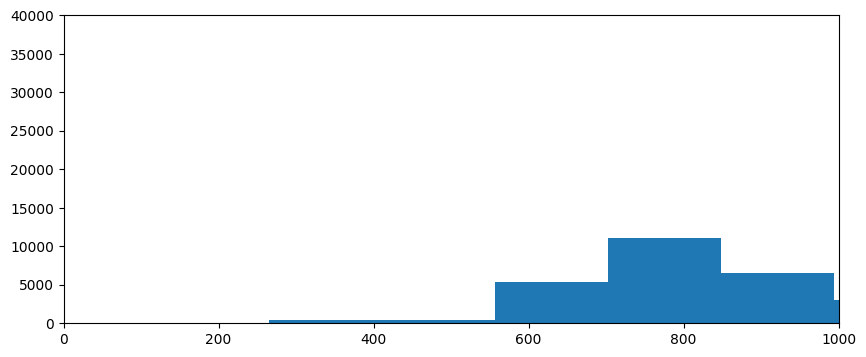

In [16]:
#Take another dimensions to appreciate the change of the histogram
plt.figure(figsize=(10,4))

plt.hist(sunspot_zoomed_1d, bins=40)
plt.ylim(0, 40000)
plt.xlim(0,1000)
plt.show


In [17]:
#Usea thresholding:
#Here we have a 1D clean space:
clean_sunspots = np.where(sunspot_zoomed_1d<500., np.nan, sunspot_zoomed_1d) #conditional, replace with, if not use...
print(clean_sunspots.shape)
clean_sunspots_2d = clean_sunspots.reshape(sunspot.shape)
print(clean_sunspots_2d.shape)



(34000, 1)
(200, 170)


<function matplotlib.pyplot.show(close=None, block=None)>

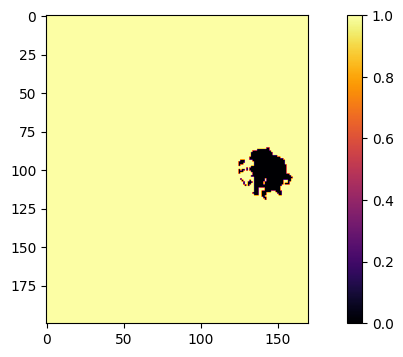

In [18]:
bin_clean= np.where(clean_sunspots_2d>0,1.,0.)
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
plt.imshow(bin_clean, cmap="inferno" )
plt.colorbar()
plt.show

### Going back to the tasks. Function binary:

In [19]:
def bin_image(sunspot_zoomed, maxintensity):
    """
    Input:
        sunspot_zoomed: read the array of the subset which is with zoom.
        maxintensity: the intensisty for the threshold
    Output:
        bin_clean: binary image (array 2D with 0 and 1 values)
    """
    #define as 1 dimension array
    sunspot_zoomed_1d = sunspot_zoomed.reshape((sunspot_zoomed.size),1)
    #make a threshold for the maximum intensity and the rest make nan
    clean_sunspots = np.where(sunspot_zoomed_1d<float(maxintensity), np.nan, sunspot_zoomed_1d)
    # make the array which was used in the threshold a 2 dimension to get a visualization
    clean_sunspots_2d = clean_sunspots.reshape(sunspot_zoomed.shape)
    #transform to a binary image:
    bin_clean= np.where(clean_sunspots_2d>0,1.,0.)

    return bin_clean


<function matplotlib.pyplot.show(close=None, block=None)>

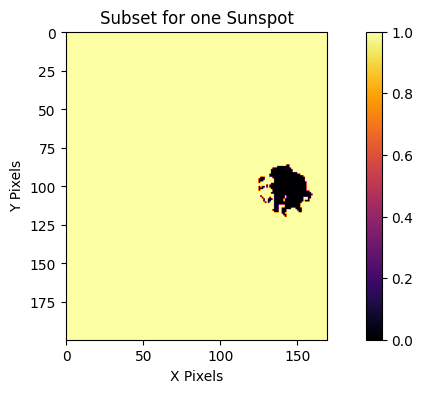

In [20]:
#define a binary image below the intensity defined
new_bin_image =  bin_image(sunspot, 500)
#Plot the figure:
plt.figure(figsize=(10,4))
plt.imshow(new_bin_image, cmap="inferno")
plt.colorbar()
plt.title('Subset for one Sunspot')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.show

In [21]:
#Option from 212:
#Get the positions where the subset in 2d is =1 
ind_sunspot2d = np.where(new_bin_image == 1)

print("Y indices are: ", ind_sunspot2d[0])

print("X indices are: ", ind_sunspot2d[1])
# Get the min/max indices (extrema)
min_x = np.min(ind_sunspot2d[1])
max_x = np.max(ind_sunspot2d[1])

min_y = np.min(ind_sunspot2d[0])
max_y = np.max(ind_sunspot2d[0])

print("X extrema: ", min_x, max_x)
print("Y extrema: ", min_y, max_y)
# Calculate the diameter by averaging
dx = max_x - min_x
dy = max_y - min_y

diam_sunspot2d = np.mean([dx, dy]) # in pixels

#Show the resutls
print("The sunspot diameter in [pixels] is: ", diam_sunspot2d)
#Get radius
radius_sunspot2d = diam_sunspot2d/2
print("The radius for the sunspot is: ", radius_sunspot2d)
#get area
area_sunspot2d = np.pi*(radius_sunspot2d**2)
print("The area for the sunspot is: ", area_sunspot2d)

#Extra option, it have fails because the shape obtained for the sunspot is not like a full circle

# #OPt used:
# print("Shape of binary image:", new_bin_image.shape)
# # print(new_bin_image)
# number_pixels = np.sum(new_bin_image) # in pixels
# radius_pixels = np.sqrt(number_pixels / np.pi)
# print("Another attempt for radius: ",radius_pixels)
# print("Diameter: ", radius_pixels*2)
# print("number of pixels: ", number_pixels)
# new_bin_image_1d = new_bin_image.flatten()
# a_diff = np.diff(new_bin_image_1d)
# a_arg= np.argwhere(a_diff)
# print(new_bin_image_1d)
# print("Index: ",a_arg)

Y indices are:  [  0   0   0 ... 199 199 199]
X indices are:  [  0   1   2 ... 167 168 169]
X extrema:  0 169
Y extrema:  0 199
The sunspot diameter in [pixels] is:  184.0
The radius for the sunspot is:  92.0
The area for the sunspot is:  26590.440219984008


In [22]:
# Pixel resolution obtained from the head: 
pix_res = hed["CDELT1"] # in arcsec

print("The size of the galaxy on the sky in [arcsec] is: ", pix_res)
#Transform to the pixel resolution from arcsec to rad 
pix_res_rad = pix_res*np.pi/(180*3600.)


The size of the galaxy on the sky in [arcsec] is:  0.600000024


In [23]:
# Distance to the Sun from Earth 
dist_sun = 1.496e8 # in Km

# Calculate the diameter:
diam_sun_phys = dist_sun*diam_sunspot2d*np.tan(pix_res_rad)

# Print the result:

print("Diameter in [Km] of the sunspot is:", diam_sun_phys)
#Calculate the radius in physical units
radius_sunspot_phys = diam_sun_phys/2
print("The radius in [Km] for the sunspot is: ", radius_sunspot_phys)
area_sunspot_phys = np.pi*(radius_sunspot_phys**2)
# print("The area for the galaxy is: ", area_sunspot_phys)


Diameter in [Km] of the sunspot is: 80071.05507322912
The radius in [Km] for the sunspot is:  40035.52753661456
